# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données en vue d'une segmentation client

#### Analyse de Forme :
- **variable target** : Inderterminée
- **lignes et colonnes** : 2240, 29 
- **types de variables** : qualitatives : 3, quantitatives : 26
- **Analyse des valeurs manquantes** :
    - Auncune NaN
    - Aucune valeur nulle
- Les individus ont dans la grande majorité le meme revenu
- Le nombre de clients acceptants l'offre est similaire dans les 5 premiéres campagnes 
elle est la plus élevée dans la derniére offre
- Le nombre d'achats effectués avec une remise est significativement élevée pour atteindre 8 achats au max avec une baisse génerale du nombre , la plupart des clients font 5 achats max malgré la remise
- La majorité des clients consomme respectivement des sucreries , des fruits , du poisson 
- Les clients achéte le plus respectivement sur le site web , à l'aide d'un catalogue , directement en magasin et visite réguliérement le site
- Trés peu de clients se sont plaint au cours des 2 derniéres années
- Trés peu de clients achéte réguliérement avec un minimum de 7 jours pour les fidéles
- Les clients ont en grande majorité des enfants moins de 18 ans , avec une dominance d'adolescents
- Les clients ont en général la licence ou plus en terme d'éducation
- Les clients sont pour la plupart marriés et ensemble avec une part significative de célibataires et de divorcés
- Les colonnes id , dt_customer et year_birth doivent etre supprimés pour le modele

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data = pd.read_csv('simplonline01.csv', delimiter="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [18]:
print(f'Le dataset contient {data.shape[0]} examples et {data.shape[1]} variables')
# print(f'il y a {np.unique(data).size} classes')

Le dataset contient 2240 examples et 29 variables


In [70]:
data.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

<AxesSubplot:ylabel='None'>

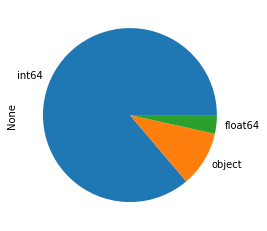

In [44]:
data.dtypes.value_counts().plot.pie()

In [39]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [38]:
missing_rate = data.isna().sum()/data.shape[0]
missing_rate

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [69]:
null_rate = data.isnull().sum()/data.shape[0]
null_rate

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [40]:
data.dropna(axis=0, inplace=True)

In [41]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# histogrames des variables continues

<AxesSubplot:xlabel='Income', ylabel='Count'>

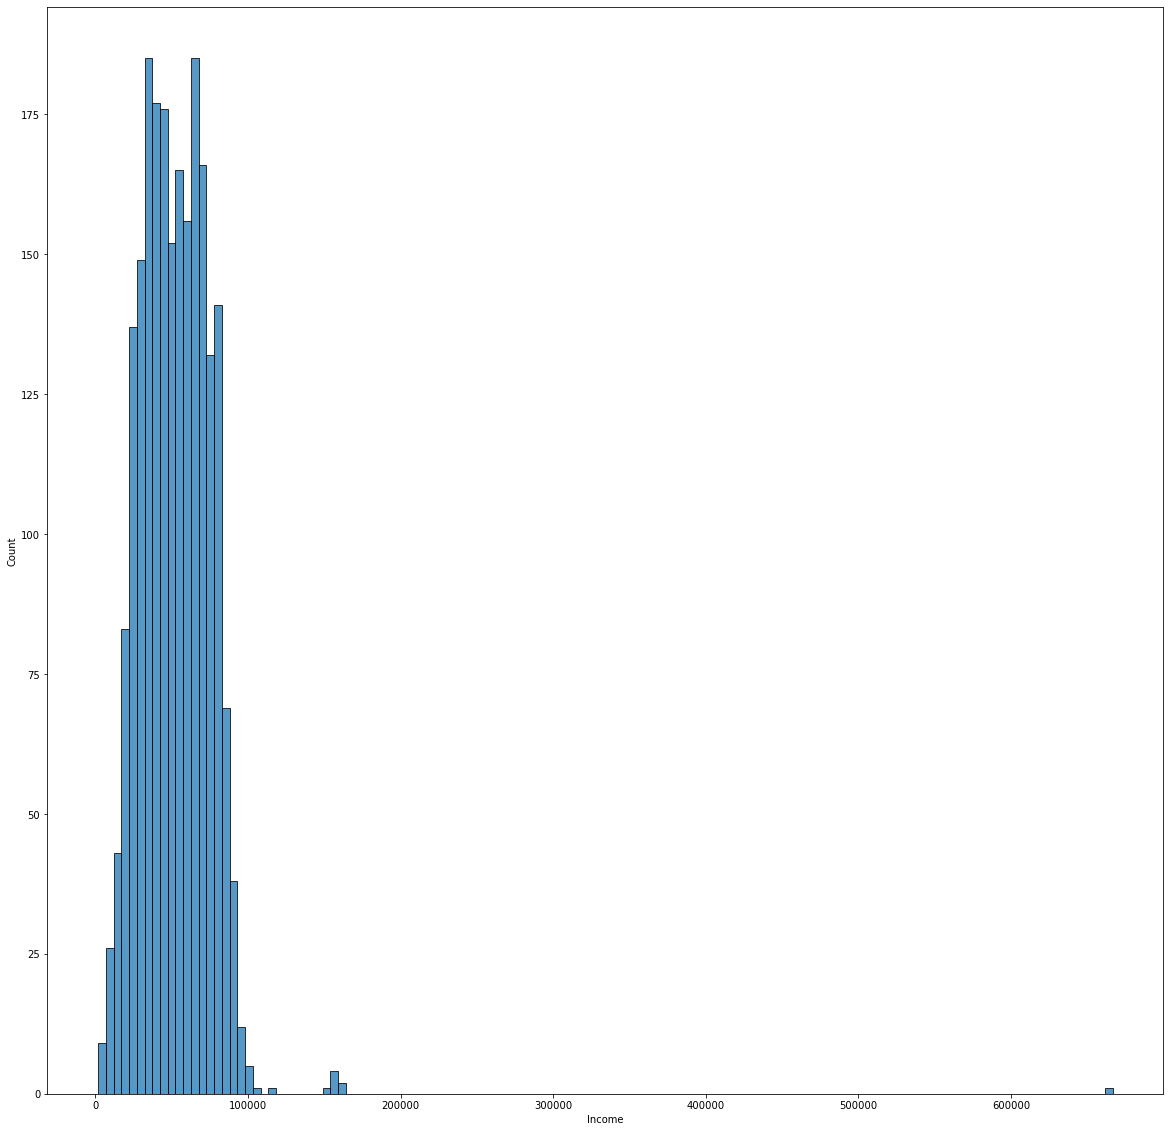

In [80]:
figure(figsize=(20, 20))
sns.histplot(x='Income', data=data)

Les revenues sont majoritairement compris entre 0 et 100000 
Trés faiblement entre 100000 et 200000 et a priori une seule personne au revenu trés élévé

In [82]:
data['Income'].value_counts().sort_values(ascending=True)

26304.0     1
43586.0     1
76773.0     1
19329.0     1
26150.0     1
           ..
83844.0     3
67445.0     3
80134.0     3
35860.0     4
7500.0     12
Name: Income, Length: 1974, dtype: int64

# Variables Qualitatives

In [46]:
for col in data.select_dtypes('object'):
    print(f'{col :-<50} {data[col].unique()}')

Education----------------------------------------- ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status------------------------------------ ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer--------------------------------------- ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '31-05-2013'
 '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012' '20-02-2013'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '02-10-2013' '28-06-2014' '09-11-2012'
 '24-05-2013' '08-11-2012' '12-05-2014' '11-08-2012' '07-06-2014'
 '12-06-2013' '19-11-2012' '02-04-2013' '28-04-2014' '03-03-2014'
 '04-07-2013' '07-09-2012' '18-02-2013' '11-06-2013' '06-12-201

In [50]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

<AxesSubplot:ylabel='Education'>

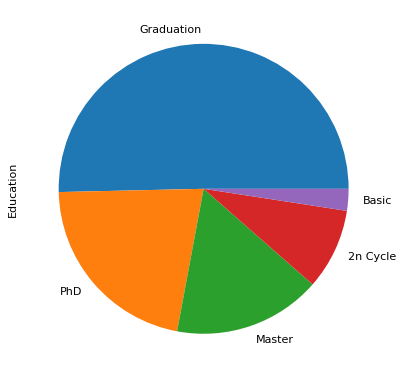

In [56]:
figure(figsize=(10, 6), dpi=80)
data['Education'].value_counts().plot.pie()

In [51]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

<AxesSubplot:ylabel='Marital_Status'>

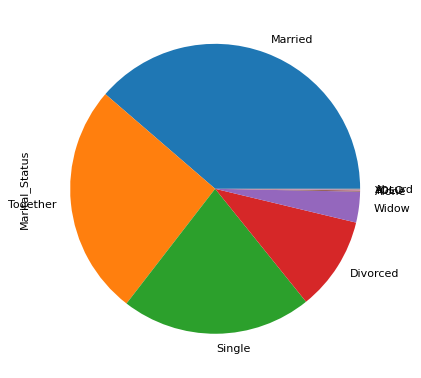

In [55]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
data['Marital_Status'].value_counts().plot.pie()

# Variables quantitatives 

In [58]:
quantitative_columns = data.columns[data.dtypes == 'int64']
quantitative_columns

Index(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt yo

No handles with labels found to put in legend.
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Laurikoffi\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles

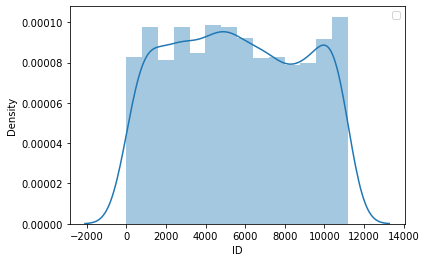

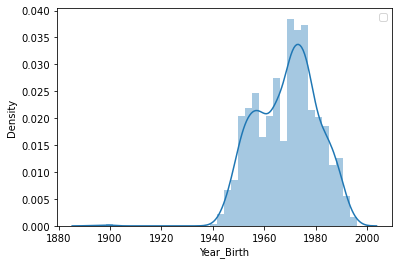

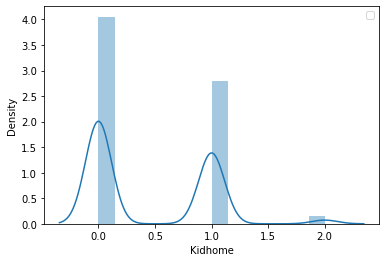

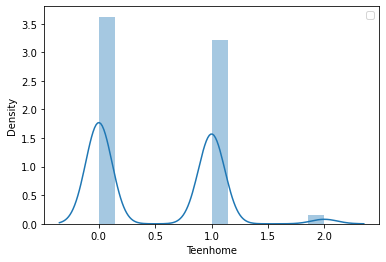

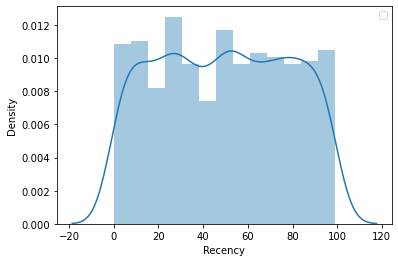

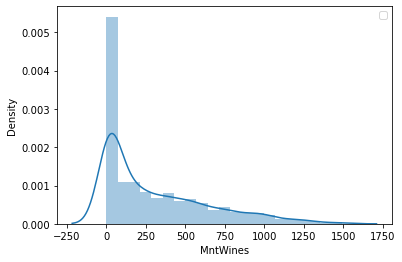

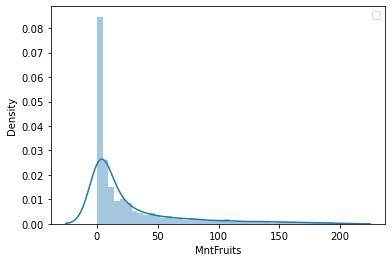

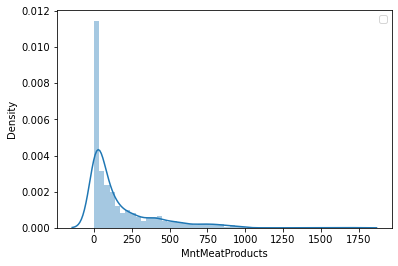

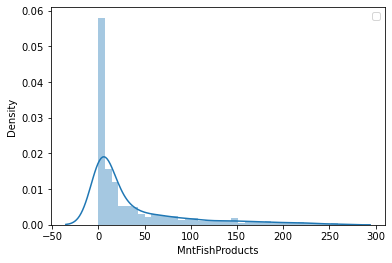

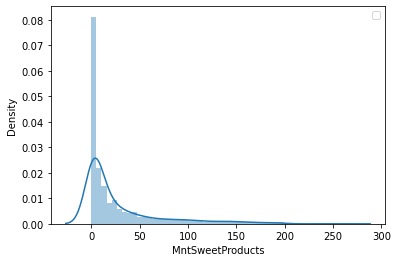

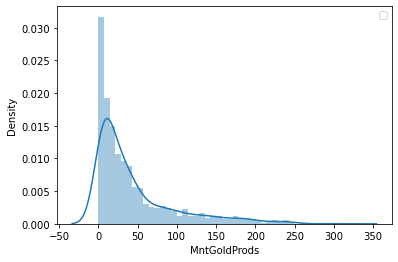

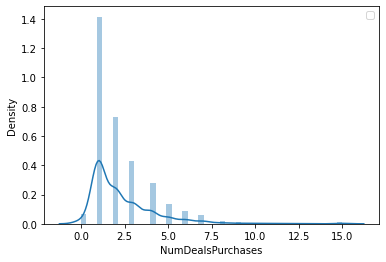

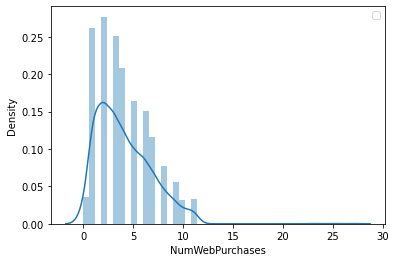

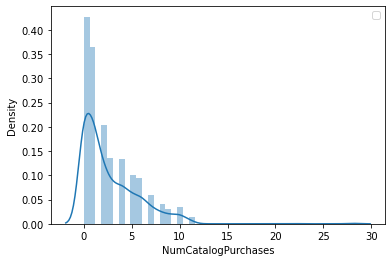

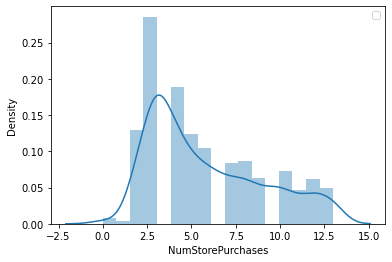

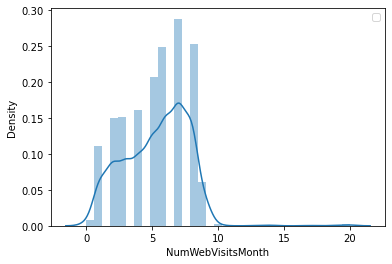

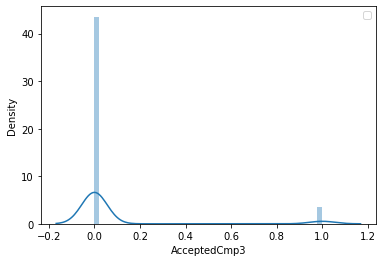

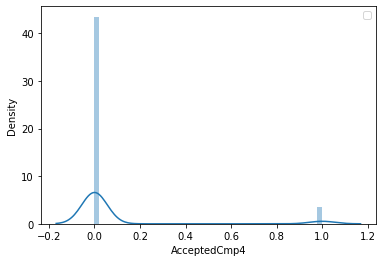

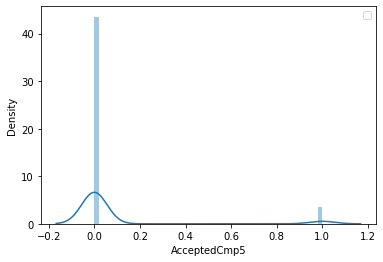

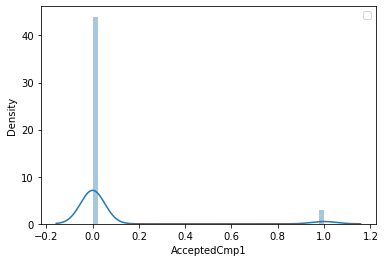

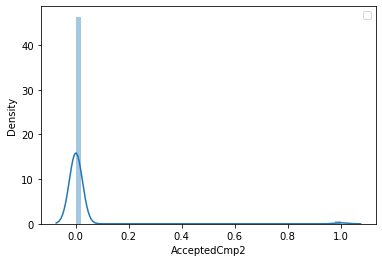

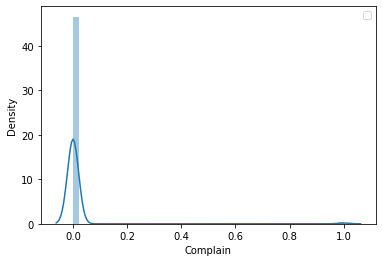

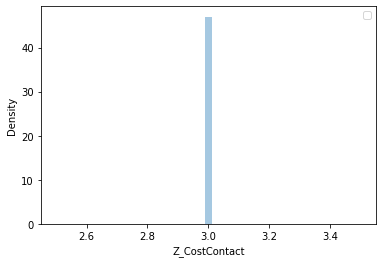

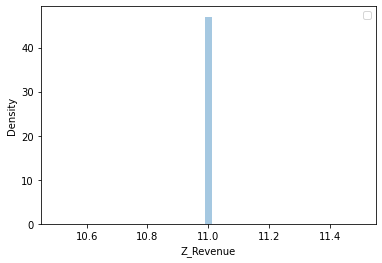

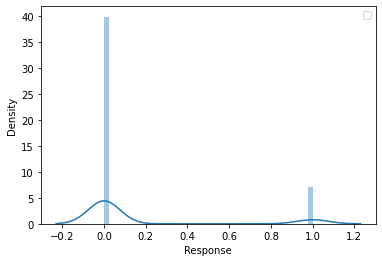

In [59]:
for col in quantitative_columns:
    plt.figure()
    sns.distplot(data[col])
    plt.legend()

In [67]:
for col in data.select_dtypes('int64'):
    print(f'{col :-<50} {data[col].value_counts()}')

ID------------------------------------------------ 2546     1
5386     1
9500     1
7451     1
5396     1
        ..
11133    1
3389     1
4749     1
6798     1
0        1
Name: ID, Length: 2216, dtype: int64
Year_Birth---------------------------------------- 1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1958    52
1977    52
1968    51
1966    50
1959    50
1960    49
1954    49
1955    48
1967    44
1963    44
1962    44
1982    44
1951    42
1986    41
1983    41
1964    41
1957    41
1980    39
1981    38
1984    38
1953    35
1961    35
1985    32
1949    30
1988    29
1989    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64
Kidhome------------------------------------------- 0    1283

In [107]:
kids_per = data['Kidhome'].sum()/data.shape[0]
kids_per

0.4417870036101083

In [108]:
teen_per = data['Teenhome'].sum()/data.shape[0]
teen_per

0.5054151624548736

In [105]:
kids_per + teen_per

0.9472021660649819

# Preprocessing

In [110]:
data.drop('Year_Birth','ID','Dt_Customer', axis=1, inplace=True)


TypeError: drop() got multiple values for argument 'axis'

In [20]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder

In [109]:
X = data[['Education', 'Marital_Status']]
X
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(X)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])